##Unsupervised Learning #CodeDaniel

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

This code imports the NumPy library as 'np', the Matplotlib library as 'plt', and the 'shuffle' function from the 'utils' module in the Scikit-learn library.

NumPy is a powerful library for numerical computing in Python, and is particularly useful for working with arrays and matrices. The 'np' alias is commonly used for convenience.

Matplotlib is a plotting library for Python that provides a wide range of visualization options. The 'plt' alias is often used as a shorthand for convenience.

The 'shuffle' function from the Scikit-learn library is a utility function for randomly shuffling the rows of a dataset. This can be useful for tasks such as creating training and test sets for machine learning algorithms.

In [45]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans

This code imports the 'load_sample_image' function from the 'datasets' module in the Scikit-learn library, and the 'KMeans' class from the 'cluster' module in the same library.

The 'load_sample_image' function is a utility function that loads a sample image from the Scikit-learn library. This can be useful for testing image processing and analysis algorithms.

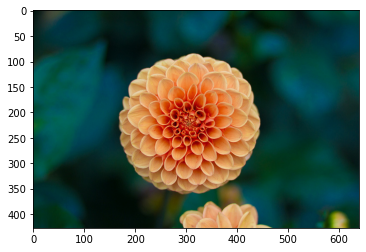

In [46]:
flower = load_sample_image('flower.jpg')

flower = np.array(flower, dtype=np.float64) / 255

plt.imshow(flower);

This code loads a sample image called 'flower.jpg' using the 'load_sample_image' function and converts it to a NumPy array of type float64. The pixel values are also normalized to the range [0, 1] by dividing by 255.

Finally, the image is displayed using the 'imshow' function from the Matplotlib library.



In [47]:
w, h, d = original_shape = tuple(flower.shape)
assert d == 3
image_array = np.reshape(flower, (w * h, d))

This code extracts the original dimensions of the loaded image (number of rows, columns, and color channels) and stores them in the variable 'original_shape'.

It then checks that the image has 3 color channels, which is expected for a typical RGB image.

Finally, it reshapes the 3D NumPy array 'flower' into a 2D NumPy array 'image_array' with shape (w * h, d), where w and h are the width and height of the image, and d is the number of color channels (which is 3 in this case).

The reshaped array 'image_array' contains all the pixel values of the original image in a long, 2D array format, where each row represents a single pixel and the columns represent the R, G, and B color values. This is a common format used for image processing and analysis tasks.

In [48]:
image_sample = shuffle(image_array, random_state=42)[:1000]

#Fit Kmeans
n_colors = 4
kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(image_sample)

#Get color indices for full image
labels = kmeans.predict(image_array)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


This code randomly selects 1000 pixels from the reshaped image array 'image_array' using the 'shuffle' function from the Scikit-learn library. The random state is set to 42 to ensure reproducibility.

It then creates a KMeans clustering object with 'n_colors' clusters (64 in this case), and fits it to the 1000 randomly selected pixels using the 'fit' method of the KMeans object.

Finally, the KMeans object is used to predict the cluster labels for all pixels in the original image array 'image_array', and these labels are stored in the 'labels' variable. The cluster labels correspond to the indices of the centroids in the KMeans clustering model that each pixel is assigned to.

This code is part of a common image processing pipeline that uses KMeans clustering to reduce the number of colors in an image. By clustering the pixels based on their color values, we can group similar colors together and replace them with the centroid color of the corresponding cluster. This reduces the number of distinct colors in the image, making it more compressed and easier to work with for certain applications.

In [49]:
def reconstruct_image(cluster_centers, labels, w, h):
    d = cluster_centers.shape[1]
    image = np.zeros((w, h, d))
    label_index = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = cluster_centers[labels[label_index]]
            label_index += 1
    return image

This code defines a function called 'reconstruct_image' that takes four arguments: 'cluster_centers', 'labels', 'w', and 'h'.

'cluster_centers' is a NumPy array that contains the centroid values for each cluster obtained from the KMeans clustering model. 'labels' is a NumPy array that contains the cluster labels for each pixel in the original image, as predicted by the KMeans model. 'w' and 'h' are the width and height of the original image.

The function first extracts the number of color channels 'd' from the shape of 'cluster_centers', which is expected to be the same as the number of color channels in the original image.

It then creates a new NumPy array called 'image' with shape (w, h, d) to store the reconstructed image.

The function then loops over each pixel in the image and uses the corresponding label to index into the 'cluster_centers' array and retrieve the centroid value for that pixel's cluster. The centroid value is then assigned to the corresponding pixel in the 'image' array.

Finally, the reconstructed image is returned as a NumPy array.

This function is used to reconstruct the compressed image from the cluster centers obtained from the KMeans model and the cluster labels assigned to each pixel in the original image.





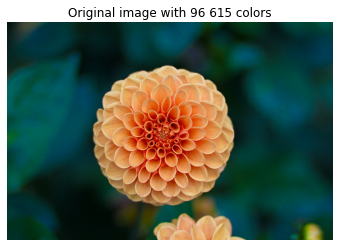

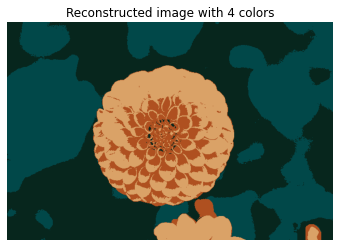

In [50]:
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image with 96 615 colors')
plt.imshow(flower);

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title(f'Reconstructed image with {n_colors} colors')
plt.imshow(reconstruct_image(kmeans.cluster_centers_, labels, w, h));

This code creates two Matplotlib figures to display the original image and the reconstructed image using the KMeans clustering model.

The first figure displays the original image using the 'imshow' function and sets the title to 'Original image with 96 615 colors'. The 'axis' function is used to turn off the display of axis ticks and labels.

The second figure displays the reconstructed image using the 'reconstruct_image' function defined earlier and the cluster centers and labels obtained from the KMeans model. The 'imshow' function is used to display the reconstructed image, and the title is set to 'Reconstructed image with {n_colors} colors', where 'n_colors' is the number of clusters used in the KMeans model (64 in this case).

Again, the 'axis' function is used to turn off the display of axis ticks and labels.

By comparing the two figures, we can see the effect of reducing the number of colors in the image using KMeans clustering. The reconstructed image has fewer colors and looks more compressed, but still retains most of the visual information from the original image.





##Principle Component Analysis (PCA) For Dimentionality Reduction

In [51]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

The first line of code imports the load_iris dataset from the sklearn.datasets module. This dataset contains information about 150 iris flowers, with 50 flowers from each of three different species (setosa, versicolor, and virginica). The dataset includes measurements of four features for each flower: sepal length, sepal width, petal length, and petal width.

The second line of code imports the PCA class from the sklearn.decomposition module. PCA stands for Principal Component Analysis, which is a technique for reducing the dimensionality of a dataset.

Together, these lines of code allow you to load the iris dataset and perform PCA on it.

In [65]:
iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

These three lines of code are used to prepare the data from the load_iris dataset for use in a machine learning model.

The first line loads the iris dataset, which contains information about 150 iris flowers with four features (sepal length, sepal width, petal length, and petal width) and three different species (setosa, versicolor, and virginica).

The second line of code extracts the feature data (i.e., the sepal length, sepal width, petal length, and petal width measurements) from the iris dataset and assigns it to a variable called X.

The third line of code extracts the target data (i.e., the species labels) from the iris dataset and assigns it to a variable called y. The target_names variable contains an array of the three species names: 'setosa', 'versicolor', and 'virginica'. These labels are used to identify the species of each flower in the dataset.

Together, these lines of code allow you to extract the feature and target data from the iris dataset, which can be used to train and evaluate a machine learning model.

In [66]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

These two lines of code perform Principal Component Analysis (PCA) on the iris dataset, which has four features (sepal length, sepal width, petal length, and petal width) for each of 150 samples (iris flowers).

The first line creates a PCA object with n_components=2, which means that we want to project the original four-dimensional data onto a two-dimensional subspace. This is a common approach to visualize high-dimensional data in two dimensions.

The second line of code fits the PCA model to the data using the fit method and then transforms the data into the new two-dimensional space using the transform method. The transformed data is assigned to a variable called X_r.

After these two lines of code, X_r contains the transformed data, where each row corresponds to a sample (iris flower) and each column corresponds to one of the two principal components. The transformed data can be used for visualization, clustering, or classification tasks.

In [67]:
print('Explained variance ratio from PCA: {}'.format(pca.explained_variance_ratio_))


Explained variance ratio from PCA: [0.92461872 0.05306648]


This line of code prints the explained variance ratio of the principal components obtained from the PCA analysis of the iris dataset. The explained variance ratio represents the amount of variance explained by each of the selected principal components.

In [68]:
colors = ['#003f5c', '#bc5090', '#ffa600']
lw=2

These lines of code define two variables: colors and lw.

colors is a list of three hexadecimal color codes: '#003f5c', '#bc5090', and '#ffa600'. These colors can be used to represent the three different species of iris flowers in a plot or visualization. The colors are a dark blue ('#003f5c') for setosa, a dark pink ('#bc5090') for versicolor, and a bright yellow ('#ffa600') for virginica.

lw is a variable that specifies the line width to use when plotting data. In this case, lw is set to 2, which means that any lines plotted will have a thickness of 2 pixels.

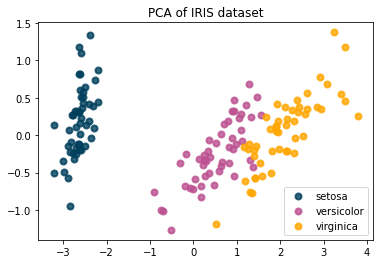

In [69]:
plt.figure()

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset');

The first line plt.figure() creates a new figure window to display the plot.

The for loop plots the transformed data (X_r) using the plt.scatter function. The loop iterates over the three different species of iris flowers and assigns a different color to each one based on the colors list that was defined earlier. The alpha parameter sets the opacity of the markers (i.e., the points on the plot) to 0.8, while the lw parameter sets the line width to the value assigned to lw (which is 2 in this case). The label parameter is set to the name of each species (target_name) and is used later when creating the plot legend.

After plotting the data, the plt.legend function creates a legend for the plot that displays the names of the three species of iris flowers. The loc parameter specifies the location of the legend (in this case, 'best'), the shadow parameter determines whether the legend has a shadow or not, and the scatterpoints parameter sets the number of markers to display in the legend.

Finally, the plt.title function sets the title of the plot to "PCA of IRIS dataset".

Overall, this code creates a scatter plot of the iris dataset that shows how the three different species of iris flowers are separated in the new two-dimensional space obtained through PCA. The plot can be useful for visualizing patterns in the data and for identifying potential relationships between the different features and the species of the flowers.



